### Data Preprocessing: Mendeley - Cardiovascular Disease Dataset
(Source: https://data.mendeley.com/datasets/dzz48mvjht/1)

In [1]:
# Import necessary libraries
import pandas as pd

# Replace 'your_dataset.csv' with the actual filename
file_path = 'D:\DigiEcon\MasterThesis\Technical Implementation\DataSets\Dataset 2 Menedely_Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path, sep=',')

# Display the first 5 rows to check it loaded correctly
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


## Dataset Description provided by the source

| S.No | Attribute                               | Assigned Code        | Unit                            | Type of the Data |
|------|-----------------------------------------|----------------------|---------------------------------|-------------------|
| 1    | Patient Identification Number           | patientid            | Number                          | Numeric           |
| 2    | Age                                     | age                  | In Years                        | Numeric           |
| 3    | Gender                                  | gender               | 0 = (female), 1= (male)      | Binary            |
| 4    | Chest pain type                         | chestpain            | 0,1,2,3 (see below)             | Nominal           |
|      |                                         |                      | 0 = typical angina              |                   |
|      |                                         |                      | 1 = atypical angina             |                   |
|      |                                         |                      | 2 = non-anginal                 |                   |
|      |                                         |                      | 3 = asymptomatic                |                   |
| 5    | Resting blood pressure                  | restingBP            | 94–200 (in mm Hg)              | Numeric           |
| 6    | Serum cholesterol                       | serumcholestrol      | 126–564 (in mg/dl)             | Numeric           |
| 7    | Fasting blood sugar                     | fastingbloodsugar    | 0,1 (>120 mg/dl)                | Binary            |
| 8    | Resting electrocardiogram results       | restingelectro       | 0,1,2 (see below)               | Nominal           |
|      |                                         |                      | 0 = normal                      |                   |
|      |                                         |                      | 1 = ST wave abnormality         |                   |
|      |                                         |                      | 2 = probable/definite LVH       |                   |
| 9    | Maximum heart rate achieved             | maxheartrate         | 71–202                          | Numeric           |
| 10   | Exercise induced angina                 | exerciseangia        | 0,1 (0 = no, 1 = yes)           | Binary            |
| 11   | Oldpeak = ST                            | oldpeak              | 0.0–6.2                         | Numeric           |
| 12   | Slope of the peak exercise ST segment   | slope                | 1,2,3                           | Nominal           |
|      |                                         |                      | 1 = upsloping                   |                   |
|      |                                         |                      | 2 = flat                        |                   |
|      |                                         |                      | 3 = downsloping                 |                   |
| 13   | Number of major vessels                 | noofmajorvessels     | 0,1,2,3                         | Numeric           |
| 14   | Classification                          | target               | 0,1 (0 = absence, 1 = presence) | Binary            |


In [2]:
#Inspect structure = 1000 observations and 14 columns including the target variable
print(df.shape)

(1000, 14)


In [3]:
#look at the data types =  oldpeak is a float, the others inters 
print(df.dtypes)

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object


In [4]:
# drop the patientid as we have the index number of the dataframe anyways

# Drop the 'id' column
df = df.drop(columns=['patientid'])

In [5]:
#confirm the removal of the patient id column
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [6]:
# Define the numerical features 
numerical_cols = [
    'age', 'restingBP', 'serumcholestrol', 
    'maxheartrate', 'oldpeak', 'noofmajorvessels'
]

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max()
}).T.round(2)

# Add number of unique values as first row
unique_vals = df[numerical_cols].nunique()
summary_stats.loc['Unique Values'] = unique_vals

# Reorder so that "Unique Values" is the first row
summary_stats = summary_stats.reindex(['Unique Values', 'Mean', 'Min', 'Max'])

# Display result
summary_stats


,age,restingBP,serumcholestrol,maxheartrate,oldpeak,noofmajorvessels
Unique Values,61.00,95.00,344.00,129.00,63.00,4.00
Mean,49.24,151.75,311.45,145.48,2.71,1.22
Min,20.00,94.00,0.00,71.00,0.00,0.00
Max,80.00,200.00,602.00,202.00,6.20,3.00


In [7]:
import pandas as pd

# List of categorical variables based on dataset description
categorical_cols = [
    'chestpain', 
    'slope',          # Nominal: 0,1,2,3
    'restingrelectro',
    'fastingbloodsugar',   # Binary     # Nominal: 0,1,2
    'exerciseangia',       # Binary               # Nominal: 1,2,3
    'target'               # Binary (CVD presence)
]

# Create dictionary to hold formatted distribution results
distribution_dict = {}

# Loop through categorical columns and compute value counts + percentages
for col in categorical_cols:
    count_series = df[col].value_counts().sort_index()
    percent_series = df[col].value_counts(normalize=True).sort_index() * 100

    # Combine into "count (percent%)" format
    combined = count_series.astype(str) + ' (' + percent_series.round(1).astype(str) + '%)'
    distribution_dict[col] = combined

# Create DataFrame, transpose for readability
distribution_df = pd.DataFrame(distribution_dict).fillna('-').T
distribution_df.index.name = 'Variable'
distribution_df.columns.name = 'Value'

# Display the distribution table
display(distribution_df)

Value,0,1,2,3
Variable,,,,
chestpain,420 (42.0%),224 (22.4%),312 (31.2%),44 (4.4%)
slope,180 (18.0%),299 (29.9%),322 (32.2%),199 (19.9%)
restingrelectro,454 (45.4%),344 (34.4%),202 (20.2%),-
fastingbloodsugar,704 (70.4%),296 (29.6%),-,-
exerciseangia,502 (50.2%),498 (49.8%),-,-
target,420 (42.0%),580 (58.0%),-,-


In [8]:
# General overview and check for missing values = no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   int64  
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   int64  
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [9]:
# check again for missing values with is null = none missing values 
df.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [10]:
#to get a general overview of the data 
df.describe().round(2)

#average patient age is 49 years
#gender is 0,1
#chestpain - has 4 types
#restingBP - check outliers
#serumcholestrol - check outliers
# fastingbloodsugar - is categorial Yes/no
#restingrelectro - categorical code 0-2
#maxheartrate - check outliers
#exerciseangia - categorial code 0 and 1
#oldpeak - check outliers
#slope - categorial code 1 to 3, check the 0
#noofmajorvessels - categorial code 0 to 3
#target variable: 0 = no disease, 1 = disease

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00,1000.00,1000.00
mean,49.24,0.76,0.98,151.75,311.45,0.30,0.75,145.48,0.5,2.71,1.54,1.22,0.58
std,17.86,0.42,0.95,29.97,132.44,0.46,0.77,34.19,0.5,1.72,1.00,0.98,0.49
min,20.00,0.00,0.00,94.00,0.00,0.00,0.00,71.00,0.0,0.00,0.00,0.00,0.00
25%,34.00,1.00,0.00,129.00,235.75,0.00,0.00,119.75,0.0,1.30,1.00,0.00,0.00
50%,49.00,1.00,1.00,147.00,318.00,0.00,1.00,146.00,0.0,2.40,2.00,1.00,1.00
75%,64.25,1.00,2.00,181.00,404.25,1.00,1.00,175.00,1.0,4.10,2.00,2.00,1.00
max,80.00,1.00,3.00,200.00,602.00,1.00,2.00,202.00,1.0,6.20,3.00,3.00,1.00


### Checking for Outliers: Slope (Categorical Code: 1-3)

In [11]:
# Check the 0 values in the slope attribute - these are probably errors 
# Count frequency of unique values in the 'slope' column
print(df['slope'].value_counts().sort_index())

# Check how many entries have slope = 0
invalid_slope_count = (df['slope'] == 0).sum()
print(f"Invalid slope entries (value = 0): {invalid_slope_count}")

slope
0    180
1    299
2    322
3    199
Name: count, dtype: int64
Invalid slope entries (value = 0): 180


In [12]:
# Get the mode (common method for imputation of categorical values of valid slope values (excluding 0)
valid_slope_mode = df.loc[df['slope'] != 0, 'slope'].mode()[0]

# Replace 0s with the mode
df['slope'] = df['slope'].replace(0, valid_slope_mode)

print(f"Replaced invalid slope values (0) with mode: {valid_slope_mode}")

Replaced invalid slope values (0) with mode: 2


### Checking for Outliers: resting BP, serumcholestrol, maxheartrate, oldpeak

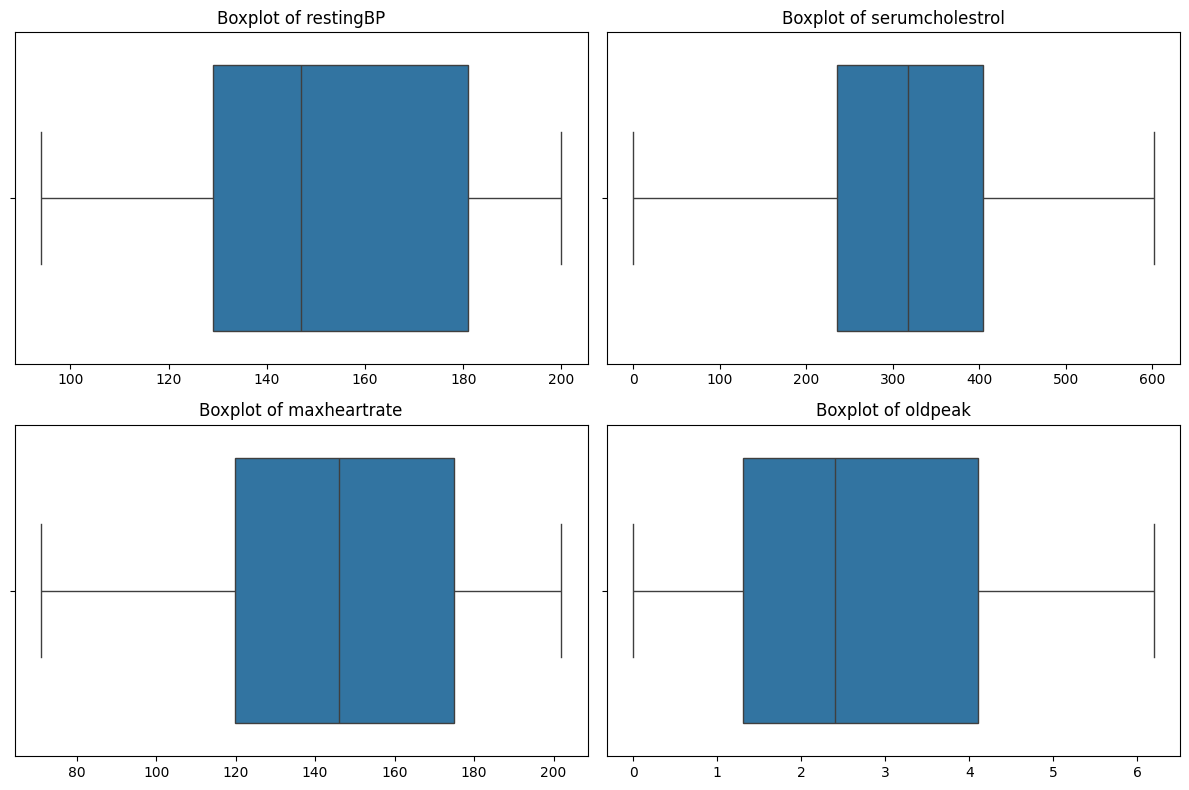

In [13]:
#using boxplots for outliers visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to plot
num_cols = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Create boxplots 
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

## Interpretation of Boxplots

### 1. Resting Blood Pressure (`restingBP`)
- Fairly symmetrical distribution.
- Range: ~95 to 200 mm Hg.
- No significant outliers.

### 2. Serum Cholesterol (`serumcholestrol`)
- Slight right-skew due to higher values.
- Range: 0 to ~600 mg/dL.
- Zeros likely represent missing values—requires data cleaning.
- Potential outliers at the upper end.

### 3. Maximum Heart Rate (`maxheartrate`)
- Symmetrical, compact distribution.
- Range: ~70 to 200 bpm.
- Minimal to no outliers.
- Variable appears clean.

### 4. Oldpeak (`oldpeak`)
- Right-skewed distribution.
- Range: 0 to ~6.2.

## Summary Recommendations
- Treat zero values in `serumcholestrol` as missing.
- Optionally transform `oldpeak` to address skewness.
- No major issues with `restingBP` and `maxheartrate`.


#### Outlier Treatment: serumcholestrol, restingBP, maxheartrate, oldpeak
- check the 0 values in serumcholestrol - indicates missing data

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to analyze for outliers
cols_to_check = ['serumcholestrol', 'restingBP', 'maxheartrate', 'oldpeak']

# Function to detect outliers using Interquartile Range (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"\n{column}:")
    print(f"IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    
    return outliers

# Run detection for each variable
for col in cols_to_check:
    detect_outliers(df, col)


serumcholestrol:
IQR: 168.50, Lower Bound: -17.00, Upper Bound: 657.00
Number of outliers: 0

restingBP:
IQR: 52.00, Lower Bound: 51.00, Upper Bound: 259.00
Number of outliers: 0

maxheartrate:
IQR: 55.25, Lower Bound: 36.88, Upper Bound: 257.88
Number of outliers: 0

oldpeak:
IQR: 2.80, Lower Bound: -2.90, Upper Bound: 8.30
Number of outliers: 0


### Outlier Treatment: Serumcholestrol

In [15]:
# Count how many zero values are present in the 'serumcholestrol' column
zero_count = (df['serumcholestrol'] == 0).sum()

print(f"0 in 'serumcholestrol': {zero_count}")

0 in 'serumcholestrol': 53


In [16]:
import numpy as np

# Replace 0 with NaN
df['serumcholestrol'] = df['serumcholestrol'].replace(0, np.nan)

# Impute missing values using the mean
mean_chol = df['serumcholestrol'].mean()
df['serumcholestrol'] = df['serumcholestrol'].fillna(mean_chol)

print(f"Imputed serumcholestrol using mean: {mean_chol:.2f}")

Imputed serumcholestrol using mean: 328.88


In [17]:
# Summary statistics after cleaning -> the 4 variables look fine now with the plausible range as an upper limit 
summary = df.describe()
print(summary)

              age       gender    chestpain    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     49.24200     0.765000     0.980000   151.747000       328.877508   
std      17.86473     0.424211     0.953157    29.965228       110.032936   
min      20.00000     0.000000     0.000000    94.000000        85.000000   
25%      34.00000     1.000000     0.000000   129.000000       249.000000   
50%      49.00000     1.000000     1.000000   147.000000       328.877508   
75%      64.25000     1.000000     2.000000   181.000000       404.250000   
max      80.00000     1.000000     3.000000   200.000000       602.000000   

       fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  \
count        1000.000000      1000.000000   1000.000000    1000.000000   
mean            0.296000         0.748000    145.477000       0.498000   
std             0.456719         0.770123     34.190268       0.500246   
min       

### Overview about the correlations: Correlation Matrix

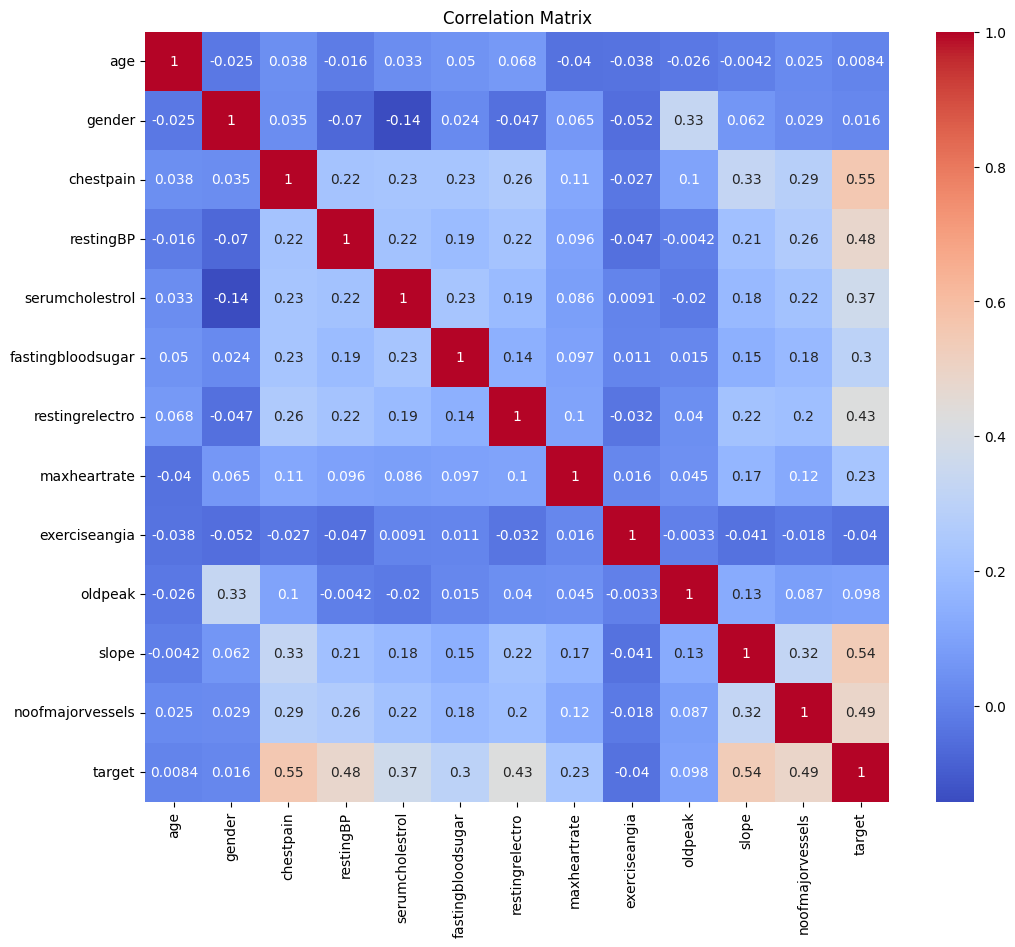

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix using full dataset
corr_matrix_full = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Interpretation:

- **Strongest links with `target` (|r| ≥ ~0.35):**
  - `chestpain` (~0.55), `slope` (~0.54), `noofmajorvessels` (~0.49), `restingBP` (~0.48), `restingelectro` (~0.43), `serumcholestrol` (~0.37).
- **Weaker/near-zero with `target`:**
  - `maxheartrate` (~0.23), `oldpeak` (~−0.10), `exerciseangina` (~−0.04), `age` (~0.01), `gender` (~0.02).

- **Among predictors (multicollinearity check):**
  - Moderate pairs only (no |r| > 0.6). Notables: `slope`–`oldpeak` (~0.32), `slope`–`noofmajorvessels` (~0.32), `chestpain`–`slope` (~0.33), `chestpain`–`noofmajorvessels` (~0.29), `serumcholestrol`–`restingBP` (~0.23).
  - This suggests **no severe multicollinearity**; standard models should be fine without heavy decorrelation.

**Summary:** `chestpain`, `slope`, `noofmajorvessels`, `restingBP`, `restingelectro`, and `serumcholestrol` look most informative; age/gender add little linearly. No red flags for multicollinearity.


### Exploration of the Target Variable (CVD Presence)

In [19]:
#see the distribution of the target variable 
df['target'].value_counts()

target
1    580
0    420
Name: count, dtype: int64

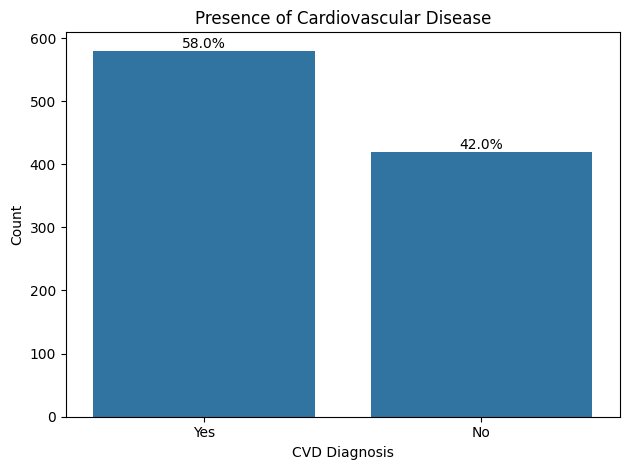

target
Yes    0.58
No     0.42
Name: proportion, dtype: float64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map target values to labels
df_target = df.copy()
df_target['target'] = df_target['target'].map({0: 'No', 1: 'Yes'})

# Plot
ax = sns.countplot(x='target', data=df_target)
plt.title("Presence of Cardiovascular Disease")
plt.xlabel("CVD Diagnosis")
plt.ylabel("Count")

# Add percentage labels
total = len(df_target)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Optional: Print percentages to console
print(df_target['target'].value_counts(normalize=True))

#### Exploration of the Gender distribution

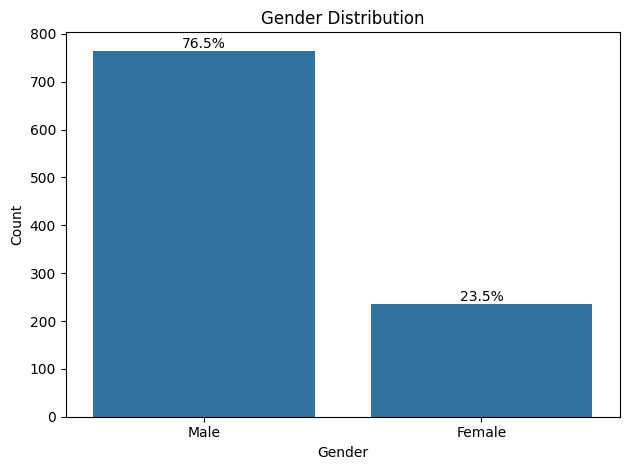

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map gender values to labels
df_gender = df.copy()
df_gender['gender'] = df_gender['gender'].map({0: 'Female', 1: 'Male'})

# Plot
ax = sns.countplot(x='gender', data=df_gender)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Add percentages on bars
total = len(df_gender)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

The original data set has an underlying distribution of 76.5% males and 23.5% females, which could lead to significant bias in the algorithm's performance for females.

### Exploration of the gender-wise distribution of CVD Presence

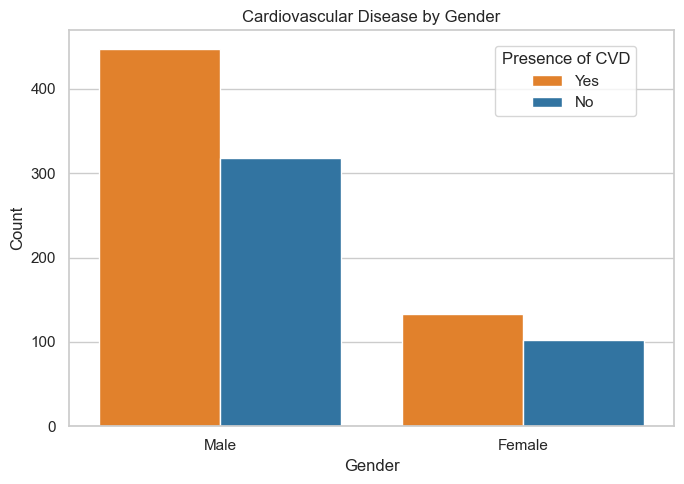

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].map({0: 'Female', 1: 'Male'})
df_plot['target'] = df_plot['target'].map({0: 'No', 1: 'Yes'})  # for legend clarity

# Set seaborn style
sns.set(style="whitegrid")

# Use a colorblind-safe palette: Blue for No, Orange for Yes
custom_palette = {'No': '#1f77b4', 'Yes': '#ff7f0e'}  # Blue, Orange

# Create the plot
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='gender', hue='target', data=df_plot, palette=custom_palette)

# Titles and labels
plt.title("Cardiovascular Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Updated legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=labels,
    title="Presence of CVD",
    loc='upper right',
    bbox_to_anchor=(0.95, 0.98)
)

plt.tight_layout()
plt.show()

In [23]:
# Gender-wise cardio outcome
pd.crosstab(df['gender'], df['target'], normalize='index')

target,0,1
gender,,
0,0.434043,0.565957
1,0.415686,0.584314


### Interpretation: CVD by Gender
- In both genders, the **“Yes (CVD present)”** bar is higher than the “No” bar.

**Exact proportions**  
_(gender: 0 = Female, 1 = Male; target: 1 = CVD present, 0 = CVD absent)_

| Gender | P(No CVD) | P(CVD) |
|-------:|-----------:|-------:|
| Female (0) | **0.4340** | **0.5660** |
| Male (1)   | **0.4157** | **0.5843** |

**Takeaways**
- **Prevalence is similar** across genders, with males slightly higher: **58.4%** vs **56.6%**.
- The **class imbalance (CVD > No CVD)** exists **within each gender**, not just overall.
- Because counts are much larger for males, models may learn patterns more from male data.
--- 

### Dataset Creation for our Experiments in context of Bias-detection:

With the following three dataset compositions:

1. **Male-skewed (75/25)** — more **men** than **women**.
2. **Female-skewed (75/25)** — more **women** than **men**.
3. **Balanced (50/50)** — equal numbers of **men** and **women**.

In [24]:
# Save the preprocessed dataset with original gender distribution to CSV
df.to_csv('MendeleyData.csv', index=False)

In [25]:
df['gender'].value_counts()

gender
1    765
0    235
Name: count, dtype: int64

In [26]:
df.groupby('gender')['target'].value_counts(normalize=True).unstack()

target,0,1
gender,,
0,0.434043,0.565957
1,0.415686,0.584314


In [27]:
# Train/Test split from ORIGINAL (cleaned) data 

from pathlib import Path
from sklearn.model_selection import train_test_split

TARGET = "target"
SENSITIVE = "gender"  # for summaries only

# 1) Separate features/target
X = df.drop(columns=[TARGET])
y = df[TARGET]

# 2) Split once (stratify on label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 3) Save to disk (freeze test set)
out_dir = Path("data_splits")
out_dir.mkdir(parents=True, exist_ok=True)

X_train.to_csv(out_dir / "X_train.csv", index=False)
y_train.to_frame(name=TARGET).to_csv(out_dir / "y_train.csv", index=False)
X_test.to_csv(out_dir / "X_test.csv", index=False)
y_test.to_frame(name=TARGET).to_csv(out_dir / "y_test.csv", index=False)

print("Saved splits to:", out_dir.resolve())

# 4) Sanity summaries
def summarize_split(Xp, yp, name):
    print(f"\n=== {name} ===")
    print("Size:", len(yp))
    print("Outcome distribution:")
    print(yp.value_counts().rename({0:"NoDisease(0)", 1:"Disease(1)"}))
    if SENSITIVE in Xp.columns:
        print("\nGender distribution:")
        print(Xp[SENSITIVE].map({0:"Female",1:"Male"}).value_counts())
        print("\nOutcome by gender:")
        print(pd.crosstab(Xp[SENSITIVE].map({0:"Female",1:"Male"}), yp,
                          rownames=[SENSITIVE], colnames=[TARGET]))

summarize_split(X_train, y_train, "TRAIN")
summarize_split(X_test, y_test, "TEST")

# 5) Optional: exact-duplicate leakage check (should be zero)
def hashed_rows(df_part: pd.DataFrame) -> pd.Series:
    # hash rows as strings to detect exact duplicates across splits
    return pd.util.hash_pandas_object(df_part.astype(str), index=False)

leak = len(set(hashed_rows(X_train)) & set(hashed_rows(X_test)))
print(f"\nExact duplicate rows across TRAIN and TEST: {leak}  (expected: 0)")

Saved splits to: D:\DigiEcon\MasterThesis\Technical Implementation\Code Files\Cardiovascular_Disease_MendeleyData\data_splits

=== TRAIN ===
Size: 800
Outcome distribution:
target
Disease(1)      464
NoDisease(0)    336
Name: count, dtype: int64

Gender distribution:
gender
Male      611
Female    189
Name: count, dtype: int64

Outcome by gender:
target    0    1
gender          
Female   82  107
Male    254  357

=== TEST ===
Size: 200
Outcome distribution:
target
Disease(1)      116
NoDisease(0)     84
Name: count, dtype: int64

Gender distribution:
gender
Male      154
Female     46
Name: count, dtype: int64

Outcome by gender:
target   0   1
gender        
Female  20  26
Male    64  90

Exact duplicate rows across TRAIN and TEST: 0  (expected: 0)


To ensure gender and outcome balance in the training dataset, we defined four subgroups (male/female × CVD = 0/1) and sampled 150 records from each. This resulted in a dataset of 600 samples with equal representation across gender and disease status. Only the two female subgroups required moderate upsampling, with the smallest subgroup (Female with No Disease) increased by a factor of ~1.83. All male subgroups had sufficient data and were sampled without replacement.

In [28]:
import pandas as pd
import numpy as np
from pathlib import Path

in_dir = Path("data_splits")
X_train = pd.read_csv(in_dir / "X_train.csv")
y_train = pd.read_csv(in_dir / "y_train.csv")

# Ensure y aligns (optional sanity check)
assert len(X_train) == len(y_train), "X_train and y_train length mismatch."
train_pool = X_train.copy()
train_pool["target"] = y_train["target"].values  # force positional alignment

TARGET = "target"
SENSITIVE = "gender"  # 1=Male, 0=Female

# add provenance id
train_pool = train_pool.reset_index().rename(columns={"index": "source_id"})

def create_balanced_dataset(df, total_size=600, male_ratio=0.5, seed=42, diagnostics=True):
    rng = np.random.default_rng(seed)

    # 1) balance outcomes globally
    n_total = total_size
    n_pos = n_total // 2
    n_neg = n_total - n_pos

    pos = df[df[TARGET] == 1]
    neg = df[df[TARGET] == 0]

    # 2) target gender counts within each outcome
    n_pos_male = int(round(n_pos * male_ratio))
    n_pos_female = n_pos - n_pos_male
    n_neg_male = int(round(n_neg * male_ratio))
    n_neg_female = n_neg - n_neg_male

    plan = [
        (pos, 1, n_pos_male, n_pos_female),
        (neg, 0, n_neg_male, n_neg_female),
    ]

    samples = []
    oversample_report = []
    for subset, yv, n_m, n_f in plan:
        males = subset[subset[SENSITIVE] == 1]
        females = subset[subset[SENSITIVE] == 0]

        # empty stratum guard
        if n_m > 0 and len(males) == 0:
            raise ValueError(f"No male samples available for y={yv}, but need {n_m}. Reduce total_size or relax ratios.")
        if n_f > 0 and len(females) == 0:
            raise ValueError(f"No female samples available for y={yv}, but need {n_f}. Reduce total_size or relax ratios.")

        repM = len(males) < n_m
        repF = len(females) < n_f

        takeM = males.sample(n=n_m, replace=repM, random_state=seed)
        takeF = females.sample(n=n_f, replace=repF, random_state=seed+1)

        samples.extend([takeM, takeF])

        if diagnostics:
            if n_m > 0:
                oversample_report.append(("y="+str(yv),"M", len(males), n_m, repM))
            if n_f > 0:
                oversample_report.append(("y="+str(yv),"F", len(females), n_f, repF))

    df_balanced = pd.concat(samples).sample(frac=1, random_state=seed).reset_index(drop=True)

    if diagnostics:
        # duplication rate
        dup_rate = 1 - df_balanced["source_id"].nunique() / len(df_balanced)
        print(f"[Diag] Duplication rate: {dup_rate:.3f}")
        for ylab, g, avail, need, rep in oversample_report:
            print(f"[Diag] {ylab} {g}: have {avail}, need {need}, oversample={rep}")

        # quick checks
        print(df_balanced[SENSITIVE].value_counts())
        print(df_balanced[TARGET].value_counts())
        print(df_balanced.groupby([SENSITIVE, TARGET]).size())

    return df_balanced

#Build datasets (use different seeds for variety)
datasets = {
    "50_50":   create_balanced_dataset(train_pool, total_size=600, male_ratio=0.50, seed=10),
    "75M_25F": create_balanced_dataset(train_pool, total_size=600, male_ratio=0.75, seed=11),
    "25M_75F": create_balanced_dataset(train_pool, total_size=600, male_ratio=0.25, seed=12),
}

out_dir = Path("data_subsets")
out_dir.mkdir(parents=True, exist_ok=True)
for name, dataset in datasets.items():
    dataset.to_csv(out_dir / f"train_{name}.csv", index=False)
    print(f"Saved {name} subset with shape {dataset.shape} to {out_dir/f'train_{name}.csv'}")

[Diag] Duplication rate: 0.268
[Diag] y=1 M: have 357, need 150, oversample=False
[Diag] y=1 F: have 107, need 150, oversample=True
[Diag] y=0 M: have 254, need 150, oversample=False
[Diag] y=0 F: have 82, need 150, oversample=True
gender
1    300
0    300
Name: count, dtype: int64
target
1    300
0    300
Name: count, dtype: int64
gender  target
0       0         150
        1         150
1       0         150
        1         150
dtype: int64
[Diag] Duplication rate: 0.000
[Diag] y=1 M: have 357, need 225, oversample=False
[Diag] y=1 F: have 107, need 75, oversample=False
[Diag] y=0 M: have 254, need 225, oversample=False
[Diag] y=0 F: have 82, need 75, oversample=False
gender
1    450
0    150
Name: count, dtype: int64
target
0    300
1    300
Name: count, dtype: int64
gender  target
0       0          75
        1          75
1       0         225
        1         225
dtype: int64
[Diag] Duplication rate: 0.460
[Diag] y=1 M: have 357, need 75, oversample=False
[Diag] y=1 F: have 

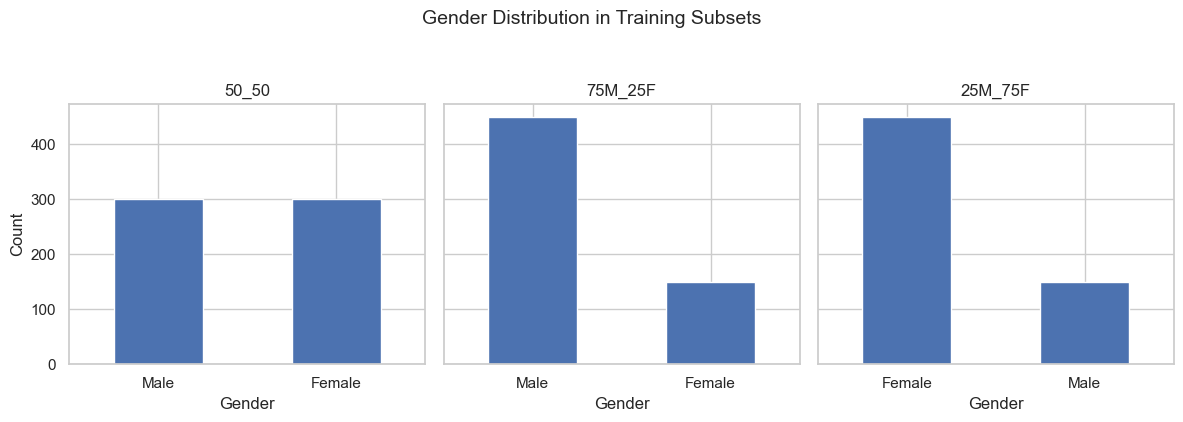

In [29]:
#final check to confirm the correct gender distribution
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load subsets
subsets_dir = Path("data_subsets")

datasets = {
    "50_50": pd.read_csv(subsets_dir / "train_50_50.csv"),
    "75M_25F": pd.read_csv(subsets_dir / "train_75M_25F.csv"),
    "25M_75F": pd.read_csv(subsets_dir / "train_25M_75F.csv"),
}

# Plot gender distribution for each subset
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (name, df) in zip(axes, datasets.items()):
    counts = df["gender"].map({0:"Female", 1:"Male"}).value_counts()
    counts.plot(kind="bar", ax=ax, rot=0)
    ax.set_title(name)
    ax.set_ylabel("Count")
    ax.set_xlabel("Gender")

plt.suptitle("Gender Distribution in Training Subsets", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()